<a href="https://colab.research.google.com/github/Avani-N-2000/Justwatch_webscrapping/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary libraries
!pip install bs4
!pip install requests
!pip install retrying
# Retrying library for when exceptions occur, and to retry conditions

In [ ]:
#import all necessary libraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import json
from retrying import retry
import time
import csv

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Create an empty list to store the URLs of movies
movie_urls=[]

# Find all div tags with the specified class name 'title-list-grid__item'
div_tags = soup.find_all('div',class_='title-list-grid__item')
# Loop through each div tag found and find anchor tags
for div_tag in div_tags:
  a_tags = div_tag.find_all('a')
  #loop through anchor tags to find 'href' attribute
  for a_tag in a_tags:
    href = a_tag.get('href')
    movie_urls.append(href)
print(movie_urls)

['/in/movie/hanu-man', '/in/movie/untitled-shahid-kapoor-kriti-sanon-film', '/in/movie/oppenheimer', '/in/movie/fighter-2022', '/in/movie/anatomie-dune-chute', '/in/movie/bramayugam', '/in/movie/poor-things', '/in/movie/animal-2022', '/in/movie/dune-2021', '/in/movie/manjummel-boys', '/in/movie/premalu', '/in/movie/road-house-2024', '/in/movie/12th-fail', '/in/movie/anyone-but-you', '/in/movie/murder-mubarak', '/in/movie/the-crew-2024', '/in/movie/dune-part-two', '/in/movie/aattam', '/in/movie/black-magic-2024', '/in/movie/kung-fu-panda', '/in/movie/article-370', '/in/movie/sam-bahadur', '/in/movie/merry-christmas-2024', '/in/movie/godzilla-x-kong-the-new-empire', '/in/movie/the-beekeeper-2024', '/in/movie/madame-web', '/in/movie/laapataa-ladies', '/in/movie/salaar', '/in/movie/eagle-2024', '/in/movie/365-days', '/in/movie/kung-fu-panda-4', '/in/movie/anweshippin-kandethum', '/in/movie/abraham-ozler', '/in/movie/the-kerala-story', '/in/movie/aquaman-and-the-lost-kingdom', '/in/movie/go

## **Scrapping Movie Title**

In [ ]:
#Create an empty list to store the titles of movies
movie_titles =[]
for div_tag in div_tags:
  # get movie title from data-title of div class
  movie_title = div_tag.get('data-title')
  movie_titles.append(movie_title)
print(movie_titles)

['Hanu-Man', 'Teri Baaton Mein Aisa Uljha Jiya', 'Oppenheimer', 'Fighter', 'Anatomy of a Fall', 'Bramayugam', 'Poor Things', 'Animal', 'Dune', 'Manjummel Boys', 'Premalu', 'Road House', '12th Fail', 'Anyone But You', 'Murder Mubarak', 'Crew', 'Dune: Part Two', 'Aattam', 'Shaitaan', 'Kung Fu Panda', 'Article 370', 'Sam Bahadur', 'Merry Christmas', 'Godzilla x Kong: The New Empire', 'The Beekeeper', 'Madame Web', 'Laapataa Ladies', 'Salaar', 'Eagle', '365 Days', 'Kung Fu Panda 4', 'Anweshippin Kandethum', 'Abraham Ozler', 'The Kerala Story', 'Aquaman and the Lost Kingdom', 'Godzilla vs. Kong', 'Madgaon Express', 'Lover', 'Godzilla Minus One', 'Ferrari', 'Gaami', 'Dunki', 'Main Atal Hoon', 'Mission: Chapter 1', 'Joker', 'Migration', 'DJ Tillu', 'The Holdovers', 'The Goat Life', 'Damsel', "Harry Potter and the Philosopher's Stone", 'Operation Valentine', 'Chaari 111', 'She Said', 'Zara Hatke Zara Bachke', 'Yodha', 'The Gentlemen', 'Por', 'Jawan', 'Vadakkupatti Ramasamy', 'Red Eye', 'Jatt N

## Scrapping individual movie pages in the website

In [ ]:
# Get homepage url for the website so that movie href can be directly appended
website_url = 'https://www.justwatch.com'
# Create a list of all url of individual movie pages
movie_links =[]
for movie_url in movie_urls:
  # To get full url, concatonate website_url with movie_url of respective movies
  full_url = f"{website_url}{movie_url}"
  movie_links.append(full_url)

## **Scrapping multiple data of the movies**

In [ ]:
# Decorator to retry the function on specific exceptions
@retry(wait_fixed=1000, stop_max_attempt_number=3)
def fetch_movie_data(movie_link):
    # Send a GET request to the movie link and parse the HTML content
    response = requests.get(movie_link)
    # Raise an exception for HTTP errors (4xx, 5xx)
    response.raise_for_status()
    return response

# Initialize empty lists to store genres and release_years
genres = []
release_years = []

# Iterate over movie links
for movie_link in movie_links:
    try:
      # Call the fetch_movie_data function, which will automatically retry on exceptions
      response = fetch_movie_data(movie_link)
      soup = BeautifulSoup(response.text, 'html.parser')
      # Get genres of the movies
      # Find the h3 element with text "Genres" for genres
      genres_heading = soup.find('h3', class_='detail-infos__subheading', string='Genres')
      if genres_heading:
          # Find the next div element
          div_element = genres_heading.find_next_sibling('div', class_='detail-infos__value')
          if div_element:
              print(div_element)
              genres_text = div_element.text.strip()
              genres.append(genres_text)
          else:
            print("$$$")
      # Get release years of movies from span tag
      span_tag = soup.find('span', class_='text-muted')
      if span_tag:
          year = span_tag.text.strip()
          release_years.append(year)

        # Add a delay of 2 seconds between requests to avoid overwhelming the server
      time.sleep(2)

    # Handle specific exceptions (network errors or value errors)
    except (requests.exceptions.RequestException, ValueError) as e:
        print(f"Request failed for {movie_link}: {e}")
# Print the genres list with single quotes removed
print(genres)
print(release_years)

<div class="detail-infos__value">Comedy, Science-Fiction, Fantasy, Action &amp; Adventure</div>
<div class="detail-infos__value">Romance, Science-Fiction, Comedy, Drama</div>
<div class="detail-infos__value">Drama, History</div>
<div class="detail-infos__value">Mystery &amp; Thriller, War &amp; Military, Action &amp; Adventure</div>
<div class="detail-infos__value">Mystery &amp; Thriller, Crime, Drama</div>
<div class="detail-infos__value">Horror, Mystery &amp; Thriller</div>
<div class="detail-infos__value">Comedy, Science-Fiction, Drama, Romance</div>
<div class="detail-infos__value">Action &amp; Adventure, Crime, Drama, Mystery &amp; Thriller</div>
<div class="detail-infos__value">Science-Fiction, Action &amp; Adventure, Drama</div>
<div class="detail-infos__value">Mystery &amp; Thriller</div>
<div class="detail-infos__value">Romance, Comedy</div>
<div class="detail-infos__value">Mystery &amp; Thriller, Action &amp; Adventure</div>
<div class="detail-infos__value">Drama</div>
<div c

In [ ]:
# Remove brackets and quotes in release_year list
release_years_cleaned = [s.replace("(", "").replace(")", "").replace("'","") for s in release_years]
print(release_years_cleaned)

['2024', '2024', '2023', '2024', '2023', '2024', '2023', '2023', '2021', '2024', '2024', '2024', '2023', '2023', '2024', '2024', '2024', '2024', '2024', '2008', '2024', '2023', '2024', '2024', '2024', '2024', '2024', '2023', '2024', '2020', '2024', '2024', '2024', '2023', '2023', '2021', '2024', '2024', '2023', '2023', '2024', '2023', '2024', '2024', '2019', '2023', '2022', '2023', '2024', '2024', '2001', '2024', '2024', '2022', '2023', '2024', '2020', '2024', '2023', '2024', '2005', '2024', '2011', '2023', '2013', '2024', '2024', '2024', '2013', '2022', '2024', '2014', '2024', '2024', '2016', '2023', '2023', '2019', '2017', '2023', '2021', '2023', '2014', '2023', '2024', '2023', '2024', '2018', '2022', '2024', '2023', '2021', '2023', '2024', '2019', '2016', '2024', '2018', '2014', '2020']


In [ ]:
# Initialize empty list for imdb ratings and runtimes
runtimes = []
imdb_ratings = []

# Iterate over movie links
for movie_link in movie_links:
    try:
        # Call the fetch_movie_data function, which will automatically retry on exceptions
        response = fetch_movie_data(movie_link)
        soup = BeautifulSoup(response.text, 'html.parser')
        # Get imdb_ratings of movies by extracting div tags from class
        div_class = soup.find_all('div',class_= 'jw-scoring-listing__rating')
        # Find all <span> elements containing the ratings
        for div_call in div_class:
            rating_spans = div_call.find('div')
            if rating_spans:
              rating_text = rating_spans.find('span')
              #remove whitespaces from the text
              ratings = rating_text.text.strip().split()[0]
              imdb_ratings.append(ratings)
              break

        # Get the runtimes of the movies
        # get div class for runtime values using heading
        run = soup.find('h3', class_= 'detail-infos__subheading', string ='Runtime')
        if run:
          # Find the next div tag containing runtime information
          runtime = run.find_next_sibling('div', class_='detail-infos__value')
          runtimes.append(runtime.text.strip())

        # Add a delay of 2 seconds between requests to avoid overwhelming the server
        time.sleep(2)
    # Handle specific exceptions (network errors or value errors)
    except (requests.exceptions.RequestException, ValueError) as e:
        print(f"Request failed for {movie_link}: {e}")
print(imdb_ratings)
print(runtimes)

['8.0', '6.5', '8.3', '6.4', '7.7', '8.0', '7.9', '6.2', '8.0', '8.7', '8.3', '6.2', '9.0', '6.2', '6.5', '7.8', '8.8', '8.3', '7.8', '7.6', '8.2', '7.8', '7.0', '6.5', '6.4', '3.8', '8.4', '6.5', '6.4', '3.3', '6.4', '7.5', '6.6', '7.0', '5.6', '6.3', '8.3', '7.1', '8.3', '6.5', '7.0', '6.7', '7.0', '6.0', '8.4', '6.7', '7.2', '7.9', '8.8', '6.1', '7.6', '5.2', '5.4', '7.3', '6.8', '6.3', '7.8', '5.2', '7.0', '6.2', '6.5', '7.9', '7.3', '6.8', '8.2', '6.0', '6.5', '6.6', '8.1', '8.3', '7.8', '8.7', '4.9', '5.1', '7.1', '7.5', '7.6', '6.0', '6.6', '7.6', '7.6', '6.9', '6.4', '7.4', '5.7', '6.3', '5.3', '8.2', '6.7', '7.8', '6.5', '8.2', '4.4', '6.5', '8.2', '8.0', '5.4', '6.3', '7.4', '7.4']
['2h 39min', '2h 21min', '3h 0min', '2h 47min', '2h 32min', '2h 19min', '2h 21min', '3h 21min', '2h 35min', '2h 15min', '2h 36min', '2h 1min', '2h 27min', '1h 43min', '2h 22min', '1h 58min', '2h 47min', '2h 19min', '2h 10min', '1h 33min', '2h 38min', '2h 30min', '2h 23min', '1h 55min', '1h 45min', 

In [ ]:
# Initialize empty list for storing production country and age rating
prod_countries = []
age_ratings = []

# Iterate over movie links
for movie_link in movie_links:
    try:
        # Call the fetch_movie_data function, which will automatically retry on exceptions
        response = fetch_movie_data(movie_link)
        soup = BeautifulSoup(response.text, 'html.parser')

        age = soup.find('h3', class_='detail-infos__subheading', string ='Age rating')
        if age:
          # Find the next div tag to get age rating values
          age_rating = age.find_next_sibling('div',class_='detail-infos__value')
          age_ratings.append(age_rating.text)

        # Get production countries of all movies
        # Get div tag for the countries using heading
        country = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')
        if country:
          # Find the next div tag to get country
          prod_country = country.find_next_sibling('div', class_='detail-infos__value')
          if prod_country:
            prod_countries.append(prod_country.text)

        # Add a delay of 2 seconds between requests to avoid overwhelming the server
        time.sleep(2)
    # Handle specific exceptions (network errors or value errors)
    except (requests.exceptions.RequestException, ValueError) as e:
        print(f"Request failed for {movie_link}: {e}")

print(age_ratings)
print(prod_countries)

['UA', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'U', 'UA', 'UA', 'UA', 'U', 'UA', 'UA', 'UA', 'A', 'UA', 'A', 'UA', 'UA', 'A', 'UA', 'UA', 'A', 'U', 'UA', 'UA', 'U', 'A', 'UA', 'A', 'UA', 'U', 'U', 'U', 'UA', 'A', 'UA', 'UA', 'U', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'A', 'U', 'UA', 'UA', 'UA', 'A', 'A']
['India', 'India', 'United States, United Kingdom', 'India', 'France', 'India', 'United States, Ireland, United Kingdom', 'India', 'United States', 'India', 'India', 'United States', 'India', 'Australia, United States', 'India', 'India', 'United States', 'India', 'India', 'United States', 'India', 'India', 'India', 'United States, Australia', 'United States, United Kingdom', 'United States', 'India', 'India', 'India', 'Poland', 'United States', 'India', 'India', 'India', 'United States', 'United States', 'India', 'India', 'Japan', 'United States, United Kingdom', 'India', 'India', 'India', 'India', 'Canada, United States', 'United States', 'India', 'United States', 'United States, India',

## **Fetching Streaming Service Details**

In [ ]:
# Initialize and empty list  to store streaming details
streaming_details = []
# Iterate over movie links
for movie_link in movie_links:
    try:
        # Call the fetch_movie_data function, which will automatically retry on exceptions
        response = fetch_movie_data(movie_link)
        soup = BeautifulSoup(response.text, 'html.parser')
        div_tag = soup.find('div', class_= 'buybox-row stream')
        # Find picture tag
        if div_tag:
          picture_tag = div_tag.find('picture', class_= 'picture-wrapper')
          img_tags = picture_tag.find_all('img')
        else:
          # Append the value as NaN if null value is getting returned after request
          streaming_details.append("NaN")
        if img_tags:
          # Get provider name by finding alt of image tags
          provider_name = img_tags[0]['alt']
          streaming_details.append(provider_name)
        else:
          print('Error')
        time.sleep(2)
    except (requests.exceptions.RequestException, ValueError) as e:
      print(f"Request failed for {movie_link}: {e}")
print(streaming_details)

['Jio Cinema', 'Amazon Prime Video', 'Jio Cinema', 'Netflix', 'Amazon Prime Video', 'Sony Liv', 'Hotstar', 'Netflix', 'Netflix', 'NaN', 'Netflix', 'aha', 'Amazon Prime Video', 'Hotstar', 'NaN', 'Hotstar', 'Netflix', 'NaN', 'Netflix', 'NaN', 'Netflix', 'Amazon Prime Video', 'NaN', 'Amazon Prime Video', 'NaN', 'Amazon Prime Video', 'NaN', 'Amazon Prime Video', 'Zee5', 'Netflix', 'NaN', 'Netflix', 'NaN', 'Netflix', 'NaN', 'Netflix', 'NaN', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Netflix', 'NaN', 'Netflix', 'Netflix', 'NaN', 'Netflix', 'Zee5', 'NaN', 'Zee5', 'Amazon Prime Video', 'NaN', 'Amazon Prime Video', 'NaN', 'Amazon Prime Video', 'NaN', 'Amazon Prime Video', 'Amazon Prime Video', 'Zee5', 'Netflix', 'Zee5', 'Amazon Prime Video', 'Netflix', 'NaN', 'Netflix', 'Sony Liv', 'NaN', 'Sony Liv', 'NaN', 'Sony Liv', 'Netflix', 'Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'NaN', 'Netflix', 'NaN', 'Netflix', 'Lionsgate Play', 'Netflix', 'Netflix', 'Amazon Prime Video

In [ ]:
# Limit the number of data to 50 to prevent variation in number of data so as to create dataframe
movie_titles = movie_titles[0:50]
movie_urls = movie_urls[0:50]
release_years_cleaned = release_years_cleaned[0:50]
genres = genres[0:50]
imdb_ratings = imdb_ratings[0:50]
age_ratings = age_ratings[0:50]
runtimes = runtimes[0:50]
prod_countries = prod_countries[0:50]
streaming_details = streaming_details[0:50]

## **Now Creating Movies DataFrame**

In [ ]:
# Create a dataframe from movie data
df =  pd.DataFrame({'Title': movie_titles,
                    'Movie url': movie_urls,
                    'Release year': release_years_cleaned,
                    'Genres': genres,
                    'IMDB rating': imdb_ratings,
                    'Age Rating': age_ratings,
                    'Runtime': runtimes,
                    'Production Country': prod_countries,
                    'Streaming Platform': streaming_details})
print(df)

                               Title  \
0                           Hanu-Man   
1   Teri Baaton Mein Aisa Uljha Jiya   
2                        Oppenheimer   
3                            Fighter   
4                  Anatomy of a Fall   
5                         Bramayugam   
6                        Poor Things   
7                             Animal   
8                               Dune   
9                     Manjummel Boys   
10                           Premalu   
11                        Road House   
12                         12th Fail   
13                    Anyone But You   
14                    Murder Mubarak   
15                              Crew   
16                    Dune: Part Two   
17                            Aattam   
18                          Shaitaan   
19                     Kung Fu Panda   
20                       Article 370   
21                       Sam Bahadur   
22                   Merry Christmas   
23   Godzilla x Kong: The New Empire   


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Create an empty list to store the URLs of tv shows
show_urls=[]

# Find all div tags with the specified class name 'title-list-grid__item'
div_tags = soup.find_all('div',class_='title-list-grid__item')
# Loop through each div tag found and find anchor tags
for div_tag in div_tags:
  a_tags = div_tag.find_all('a')
  #loop through anchor tags to find 'href' attribute
  for a_tag in a_tags:
    href = a_tag.get('href')
    show_urls.append(href)
print(show_urls)

['/in/tv-show/shogun-2024', '/in/tv-show/mirzapur', '/in/tv-show/3-body-problem', '/in/tv-show/panchayat', '/in/tv-show/game-of-thrones', '/in/tv-show/the-gentlemen', '/in/tv-show/solo-leveling-2024', '/in/tv-show/sunflower-2021', '/in/tv-show/maharani-2021', '/in/tv-show/maamla-legal-hai', '/in/tv-show/apharan', '/in/tv-show/attack-on-titan', '/in/tv-show/inspector-rishi', '/in/tv-show/invincible', '/in/tv-show/ripley', '/in/tv-show/jujutsu-kaisen', '/in/tv-show/halo', '/in/tv-show/save-the-tigers', '/in/tv-show/young-sheldon', '/in/tv-show/farzi', '/in/tv-show/mastram', '/in/tv-show/avatar-the-last-airbender', '/in/tv-show/fallout', '/in/tv-show/untitled-kapil-sharma-netflix-project', '/in/tv-show/a-gentleman-in-moscow', '/in/tv-show/queen-of-tears', '/in/tv-show/true-detective', '/in/tv-show/lootere', '/in/tv-show/loki', '/in/tv-show/parasyte-the-grey', '/in/tv-show/jack-reacher', '/in/tv-show/naruto', '/in/tv-show/scam-1992', '/in/tv-show/the-family-man', '/in/tv-show/naruto-shippu

## **Fetching Tv Show Title details**

In [ ]:
#Create an empty list to store the titles of shows
show_titles =[]
for div_tag in div_tags:
  # get movie title from data-title of div class
  show = div_tag.get('data-title')
  show_titles.append(show)
print(show_titles)

['Shōgun', 'Mirzapur', '3 Body Problem', 'Panchayat', 'Game of Thrones', 'The Gentlemen', 'Solo Leveling', 'Sunflower', 'Maharani', 'Maamla Legal Hai', 'Apharan', 'Attack on Titan', 'Inspector Rishi', 'Invincible', 'Ripley', 'Jujutsu Kaisen', 'Halo', 'Saving the Tigers', 'Young Sheldon', 'Farzi', 'Mastram', 'Avatar: The Last Airbender', 'Fallout', 'The Great Indian Kapil Show', 'A Gentleman in Moscow', 'Queen of Tears', 'True Detective', 'Lootere', 'Loki', 'Parasyte: The Grey', 'Reacher', 'Naruto', 'Scam 1992', 'The Family Man', 'Naruto Shippūden', 'Gandii Baat', '9-1-1', 'Supersex', 'Euphoria', 'Yellowstone', 'Money Heist', 'Gullak', 'House of the Dragon', 'Under the Dome', "X-Men '97", 'The Rookie', 'Breaking Bad', 'Turning Point: The Bomb and the Cold War', 'Lucifer', 'Peaky Blinders', 'The Vampire Diaries', 'Testament: The Story of Moses', 'Dehati Ladke', 'Dark Desire', 'Aashram', 'Modern Family', "Grey's Anatomy", 'The Good Doctor', 'Manhunt', 'Asur: Welcome to Your Dark Side', 'T

# **Scrapping show links from websites**

In [ ]:
# Get homepage url for the website so that show href can be directly appended
website_url = 'https://www.justwatch.com'
show_links = []
for show_url in show_urls:
  # To get full url, concatonate website_url with show_url of respective shows
  full_url = f"{website_url}{show_url}"
  show_links.append(full_url)
print(show_links)

['https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/3-body-problem', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/the-gentlemen', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'https://www.justwatch.com/in/tv-show/sunflower-2021', 'https://www.justwatch.com/in/tv-show/maharani-2021', 'https://www.justwatch.com/in/tv-show/maamla-legal-hai', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/inspector-rishi', 'https://www.justwatch.com/in/tv-show/invincible', 'https://www.justwatch.com/in/tv-show/ripley', 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen', 'https://www.justwatch.com/in/tv-show/halo', 'https://www.justwatch.com/in/tv-show/save-the-tigers', 'https://www.justwatch.com/in/tv-show/young-

# Scrapping multiple data from the TV **Shows**

In [ ]:
# Decorator to retry the function on specific exceptions
@retry(wait_fixed=1000, stop_max_attempt_number=3)
def fetch_show_data(show_link):
    # Send a GET request to the movie link and parse the HTML content
    response = requests.get(show_link)
    # Raise an exception for HTTP errors (4xx, 5xx)
    response.raise_for_status()
    return response

# Initialize empty genres and release years list
s_genres = []
s_release_years = []
# Iterate over show links
for show_link in show_links:
    try:
      # Call the fetch_show_data function, which will automatically retry on exceptions
      response = fetch_show_data(show_link)
      soup = BeautifulSoup(response.text, 'html.parser')
      # Get genres of the shows
      # Find the h3 element with text "Genres" for genres
      genres_heading = soup.find('h3', class_='detail-infos__subheading', string='Genres')
      if genres_heading:
          # Find the next div element
          div_element = genres_heading.find_next_sibling('div', class_='detail-infos__value')
          if div_element:
              genres_text = div_element.text.strip()
              s_genres.append(genres_text)
      # Get release years of shows from span tag
      span_tag = soup.find('span', class_='text-muted')
      if span_tag:
          year = span_tag.text.strip()
          s_release_years.append(year)

        # Add a delay of 2 seconds between requests to avoid overwhelming the server
      time.sleep(2)

    # Handle specific exceptions (network errors or value errors)
    except (requests.exceptions.RequestException, ValueError) as e:
        print(f"Request failed for {show_link}: {e}")
# Print the genres list with single quotes removed
print(s_genres)
s_release_years_cleaned = [s.replace("(", "").replace(")", "").replace("'","") for s in s_release_years]
print(s_release_years_cleaned)

['Drama, War & Military, History', 'Crime, Action & Adventure, Drama, Mystery & Thriller', 'Science-Fiction, Mystery & Thriller, Drama, Fantasy', 'Comedy, Drama', 'Action & Adventure, Drama, Fantasy, Science-Fiction', 'Action & Adventure, Comedy, Crime, Drama', 'Fantasy, Animation, Action & Adventure, Science-Fiction', 'Comedy, Crime', 'Drama', 'Drama, Comedy', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction', 'Horror, Action & Adventure, Drama, Mystery & Thriller', 'Drama, Animation, Science-Fiction, Action & Adventure, Mystery & Thriller, Fantasy', 'Mystery & Thriller, Crime, Drama', 'Animation, Action & Adventure, Fantasy, Mystery & Thriller, Science-Fiction', 'Science-Fiction, Action & Adventure, Mystery & Thriller, War & Military', 'Comedy, Drama, Mystery & Thriller', 'Comedy, Kids & Family', 'Crime, Drama, Mystery & Thriller', 'Drama, Comedy, Fantasy', 'Science-Fiction, Action & Adventure, Fantasy, Co

In [ ]:
# Initialize empty list for imdb ratings and runtimes
s_runtimes = []
s_imdb_ratings = []

# Iterate over show links
for show_link in show_links:
    try:
        # Call the fetch_show_data function, which will automatically retry on exceptions
        response = fetch_show_data(show_link)
        soup = BeautifulSoup(response.text, 'html.parser')
        # Get imdb_ratings of shows by extracting div tags from class
        div_class = soup.find_all('div',class_= 'jw-scoring-listing__rating')
        # Find all <span> elements containing the ratings
        for div_call in div_class:
            rating_spans = div_call.find('div')
            if rating_spans:
              rating_text = rating_spans.find('span')
              #remove whitespaces from the text
              s_ratings = rating_text.text.strip().split()[0]
              s_imdb_ratings.append(s_ratings)
              break

        # Get the runtimes of the shows
        # get div class for runtime values using heading
        run = soup.find('h3', class_= 'detail-infos__subheading', string ='Runtime')
        if run:
          # Find the next div tag containing runtime information
          runtime = run.find_next_sibling('div', class_='detail-infos__value')
          s_runtimes.append(runtime.text.strip())

        # Add a delay of 2 seconds between requests to avoid overwhelming the server
        time.sleep(2)
    # Handle specific exceptions (network errors or value errors)
    except (requests.exceptions.RequestException, ValueError) as e:
        print(f"Request failed for {show_link}: {e}")
print(s_imdb_ratings)
print(s_runtimes)

['9.1', '8.5', '7.7', '8.9', '9.2', '8.2', '8.4', '7.5', '7.9', '8.1', '8.3', '9.0', '7.2', '8.7', '8.1', '8.6', '7.3', '8.1', '7.6', '8.4', '7.1', '7.2', '8.7', '7.9', '6.5', '8.9', '6.8', '8.2', '7.3', '8.1', '8.4', '9.3', '8.7', '8.7', '3.4', '7.9', '6.3', '8.3', '8.7', '8.2', '9.1', '8.4', '6.5', '8.0', '9.5', '8.3', '8.1', '8.8', '7.7', '6.2', '7.2', '6.5', '7.4', '8.5', '7.6', '8.0', '7.2', '8.5', '8.1', '7.5', '8.2', '7.9', '8.5', '7.6', '8.7', '8.7', '7.7', '8.7', '8.5', '7.6', '8.7', '8.9', '9.1', '7.0', '8.0', '8.0', '9.3', '6.4', '7.3', '8.5', '8.7', '8.1', '5.2', '8.0', '5.4', '9.0', '6.5', '7.9', '7.9', '6.2', '6.7', '8.8', '3.7', '8.0', '7.7', '8.6']
['58min', '50min', '56min', '33min', '57min', '50min', '24min', '37min', '44min', '32min', '24min', '25min', '45min', '49min', '56min', '23min', '52min', '27min', '19min', '56min', '28min', '54min', '59min', '53min', '49min', '1h 27min', '1h 1min', '45min', '49min', '50min', '48min', '23min', '52min', '45min', '24min', '44min

In [ ]:
s_age_ratings = []
s_prod_countries = []
# Iterate over show links
for show_link in show_links:
    try:
        # Call the fetch_show_data function, which will automatically retry on exceptions
        response = fetch_show_data(show_link)
        soup = BeautifulSoup(response.text, 'html.parser')
        age = soup.find('h3', class_='detail-infos__subheading', string ='Age rating')
        if age:
          # Find the next div tag to get age rating values
          age_rating = age.find_next_sibling('div',class_='detail-infos__value')
          s_age_ratings.append(age_rating.text)

        # Get production countries of all shows
        # Get div tag for the countries using heading
        country = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')
        if country:
          # Find the next div tag to get country
          prod_country = country.find_next_sibling('div', class_='detail-infos__value')
          if prod_country:
            s_prod_countries.append(prod_country.text.strip())

        # Add a delay of 2 seconds between requests to avoid overwhelming the server
        time.sleep(2)
    # Handle specific exceptions (network errors or value errors)
    except (requests.exceptions.RequestException, ValueError) as e:
        print(f"Request failed for {show_link}: {e}")

print(s_age_ratings)
print(s_prod_countries)


['A', 'A', 'A', 'A', 'UA', 'UA', 'A', 'U', 'A', 'U', 'A', 'U', 'A', 'A', 'A', 'U', 'U', 'A', 'U', 'U', 'A', 'U', 'A', 'A', 'U', 'U', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'A']
['United States', 'India', 'United States', 'India', 'United Kingdom, United States', 'United Kingdom, United States', 'Japan, South Korea', 'India', 'India', 'India', 'India', 'Japan', 'India', 'United States', 'United States', 'United States, Japan', 'United States', 'India', 'United States', 'India', 'India', 'United States', 'United States', 'India', 'United Kingdom', 'South Korea', 'United States', 'India', 'United States', 'South Korea', 'United States', 'Japan', 'India', 'India', 'Japan', 'India', 'United States', 'Italy', 'United States', 'United States', 'Spain', 'India', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United Kingdom', 'United States', 'United States', 'India', 'Mexico', 'India', 'United States', 'United State

## **Fetching Streaming Service details**

In [ ]:
# Initialize and empty list  to store streaming details
s_streaming_details = []
# Iterate over show links
for show_link in show_links:
    try:
        # Call the fetch_show_data function, which will automatically retry on exceptions
        response = fetch_show_data(show_link)
        soup = BeautifulSoup(response.text, 'html.parser')
        div_tag = soup.find('div', class_= 'buybox-row stream')
        # Find picture tag
        if div_tag:
          picture_tag = div_tag.find('picture', class_= 'picture-wrapper')
          img_tags = picture_tag.find_all('img')
        else:
          # Append the value as NaN if null value is getting returned after request
          s_streaming_details.append("NaN")
        if img_tags:
          # Get provider name by finding alt of image tags
          provider_name = img_tags[0]['alt']
          s_streaming_details.append(provider_name)
        else:
          print('Error')
        time.sleep(2)
    except (requests.exceptions.RequestException, ValueError) as e:
      print(f"Request failed for {movie_link}: {e}")
print(s_streaming_details)


['Hotstar', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'Jio Cinema', 'Netflix', 'Crunchyroll', 'VI movies and tv', 'Sony Liv', 'Netflix', 'Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Netflix', 'NaN', 'Netflix', 'Hotstar', 'Amazon Prime Video', 'Amazon Prime Video', 'NaN', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Jio Cinema', 'Hotstar', 'Hotstar', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Sony Liv', 'Amazon Prime Video', 'Netflix', 'Alt Balaji', 'Hotstar', 'Netflix', 'Jio Cinema', 'Netflix', 'Netflix', 'Sony Liv', 'Jio Cinema', 'Amazon Prime Video', 'NaN', 'Amazon Prime Video', 'NaN', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Netflix', 'Netflix', 'Netflix', 'Netflix', 'Amazon miniTV', 'Netflix', 'MX Player', 'Hotstar', 'Hotstar', 'Netflix', 'Apple TV Plus', 'Jio Cinema', 'Hotstar', 'NaN', 'Hotstar', 'Netflix', 'Hotstar', 'Lionsgate Play', 'Crunchyroll', 'Netflix', 

In [ ]:
# Limit number of data to 50
show_titles = show_titles[0:50]
show_urls = show_urls[0:50]
s_release_years_cleaned = s_release_years_cleaned[0:50]
s_genres = s_genres[0:50]
s_imdb_ratings = s_imdb_ratings[0:50]
s_runtimes = s_runtimes[0:50]
s_prod_countries = s_prod_countries[0:50]
s_streaming_details = s_streaming_details[0:50]

## **Creating TV Show DataFrame**

In [ ]:
# Create a dataframe for tv show data
s_df =  pd.DataFrame({'Title': show_titles,
                    'Show url': show_urls,
                    'Release year': s_release_years_cleaned,
                    'Genres': s_genres,
                    'IMDB rating': s_imdb_ratings,
                    'Runtime': s_runtimes,
                    'Production Country': s_prod_countries,
                    'Streaming Platform': s_streaming_details})
print(s_df)

                                       Title  \
0                                     Shōgun   
1                                   Mirzapur   
2                             3 Body Problem   
3                                  Panchayat   
4                            Game of Thrones   
5                              The Gentlemen   
6                              Solo Leveling   
7                                  Sunflower   
8                                   Maharani   
9                           Maamla Legal Hai   
10                                   Apharan   
11                           Attack on Titan   
12                           Inspector Rishi   
13                                Invincible   
14                                    Ripley   
15                            Jujutsu Kaisen   
16                                      Halo   
17                         Saving the Tigers   
18                             Young Sheldon   
19                                     F

## **Converting to csv files and exporting**




In [ ]:
# Save Dataframe to A csv file to save the data obtained
df.to_csv('movies.csv',index = False)
s_df.to_csv('shows.csv', index = False)

# Obtain the csv files
movies = pd.read_csv('movies.csv')
shows = pd.read_csv('shows.csv')


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Data filtering of movies
# import datetime library to access date and manipulate data based on dates
from datetime import datetime
# Current year
current_year = datetime.now().year
# Convert 'Release Year' and 'IMDb Rating' columns to float
df['Release year'] = df['Release year'].astype(int)
df['IMDB rating'] = df['IMDB rating'].astype(float)

# Filter DataFrame based on conditions (release year within the last 2 years and IMDb rating >= 7.0)
filtered_df = df[(df['Release year'] >= current_year - 2) & (df['IMDB rating'] >= 7.0)]
print("Movies released in last 2 years and with rating 7+")
print(filtered_df)

#Filter DataFrame based on release year within the last 2 years of movies
last_2_year_movies = df[(df['Release year'] >= current_year - 2)]
print("\nMovies released in last 2 years")
print(last_2_year_movies)

# Filter DataFrame of movies based on IMDB rating> 7.0
imdb_7 = df[df['IMDB rating'] >= 7.0]
print("\nMovies with IMDB rating greater than 7.0")
print(imdb_7)

# Create a csv file to store movie filter dataframes
# Define the CSV file path
csv_file_path = "combined_data_movie.csv"

# Write the first DataFrame to the CSV file
filtered_df.to_csv(csv_file_path, mode='w', index=False, header='Movies released within last 2 years with IMDB rating > 7.0')

# Append the second DataFrame to the CSV file
last_2_year_movies.to_csv(csv_file_path, mode='a', index=False, header= True)

# Append the second DataFrame to the CSV file
last_2_year_movies.to_csv(csv_file_path, mode='a', index=False, header=True)

# Obtain CSV file
movie_filter = pd.read_csv(csv_file_path)

Movies released in last 2 years and with rating 7+
                    Title                        Movie url  Release year  \
0                Hanu-Man               /in/movie/hanu-man          2024   
2             Oppenheimer            /in/movie/oppenheimer          2023   
4       Anatomy of a Fall    /in/movie/anatomie-dune-chute          2023   
5              Bramayugam             /in/movie/bramayugam          2024   
6             Poor Things            /in/movie/poor-things          2023   
9          Manjummel Boys         /in/movie/manjummel-boys          2024   
10                Premalu                /in/movie/premalu          2024   
12              12th Fail              /in/movie/12th-fail          2023   
15                   Crew          /in/movie/the-crew-2024          2024   
16         Dune: Part Two          /in/movie/dune-part-two          2024   
17                 Aattam                 /in/movie/aattam          2024   
18               Shaitaan       /in/m

In [ ]:
print(movie_filter)

                 Title                      Movie url Release year  \
0             Hanu-Man             /in/movie/hanu-man         2024   
1          Oppenheimer          /in/movie/oppenheimer         2023   
2    Anatomy of a Fall  /in/movie/anatomie-dune-chute         2023   
3           Bramayugam           /in/movie/bramayugam         2024   
4          Poor Things          /in/movie/poor-things         2023   
..                 ...                            ...          ...   
113          Migration            /in/movie/migration         2023   
114           DJ Tillu             /in/movie/dj-tillu         2022   
115      The Holdovers        /in/movie/the-holdovers         2023   
116      The Goat Life        /in/movie/aadujeevitham         2024   
117             Damsel          /in/movie/damsel-2023         2024   

                                                Genres IMDB rating Age Rating  \
0    Comedy, Science-Fiction, Fantasy, Action & Adv...         8.0         UA 

In [ ]:
# Data filtering of shows

# Convert 'Release Year' and 'IMDb rating' columns to float and int
s_df['Release year'] = s_df['Release year'].astype(int)
s_df['IMDB rating'] = s_df['IMDB rating'].astype(float)

# Filter DataFrame based on conditions (release year within the last 2 years and IMDb rating >= 7.0)
s_filtered_df = s_df[(s_df['Release year'] >= current_year - 2) & (s_df['IMDB rating'] >= 7.0)]
print("Shows released in the last 2 years with rating 7+")
print(s_filtered_df)

#Filter DataFrame based on release year within the last 2 years of shows
s_last_2_year_movies = s_df[(s_df['Release year'] >= current_year - 2)]
print("\nShows released in last 2 years")
print(s_last_2_year_movies)

# Filter DataFrame of shows based on IMDB rating> 7.0
s_imdb_7 = s_df[s_df['IMDB rating'] >= 7.0]
print("\nShows with IMDB rating greater than 7.0")
print(s_imdb_7)

# Create a csv file to store shows filter dataframes
# Define the CSV file path
csv_file_path = "combined_data_show.csv"

# Write the first DataFrame to the CSV file
s_filtered_df.to_csv(csv_file_path, mode='w', index=False, header='Shows released within last 2 years with IMDB rating > 7.0')

# Append the second DataFrame to the CSV file
s_last_2_year_movies.to_csv(csv_file_path, mode='a', index=False, header= True)

# Append the second DataFrame to the CSV file
s_last_2_year_movies.to_csv(csv_file_path, mode='a', index=False, header=True)

# Obtain CSV file
show_filter = pd.read_csv(csv_file_path)

Shows released in the last 2 years with rating 7+
                                       Title  \
0                                     Shōgun   
2                             3 Body Problem   
5                              The Gentlemen   
6                              Solo Leveling   
9                           Maamla Legal Hai   
12                           Inspector Rishi   
14                                    Ripley   
16                                      Halo   
17                         Saving the Tigers   
19                                     Farzi   
21                Avatar: The Last Airbender   
22                                   Fallout   
23               The Great Indian Kapil Show   
25                            Queen of Tears   
27                                   Lootere   
29                        Parasyte: The Grey   
30                                   Reacher   
37                                  Supersex   
44                                 X-M

In [ ]:
print(show_filter)

                                       Title  \
0                                     Shōgun   
1                             3 Body Problem   
2                              The Gentlemen   
3                              Solo Leveling   
4                           Maamla Legal Hai   
..                                       ...   
61                                   Reacher   
62                                  Supersex   
63                       House of the Dragon   
64                                 X-Men '97   
65  Turning Point: The Bomb and the Cold War   

                                             Show url Release year  \
0                             /in/tv-show/shogun-2024         2024   
1                          /in/tv-show/3-body-problem         2024   
2                           /in/tv-show/the-gentlemen         2024   
3                      /in/tv-show/solo-leveling-2024         2024   
4                        /in/tv-show/maamla-legal-hai         2024   
.. 

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Calculate mean of imdb ratings for both movies and tv shows
# .apply(float) will convert string values to float
mean_imdb_movies = df['IMDB rating'].apply(float).mean().round(2)
mean_imdb_shows = s_df['IMDB rating'].apply(float).mean().round(2)
print(f"Mean IMDB rating of movies are {mean_imdb_movies} and mean IMDB rating of tv shows are {mean_imdb_shows}")

Mean IMDB rating of movies are 7.16 and mean IMDB rating of tv shows are 8.0


## **Analyzing Top Genres**

In [ ]:
# Find Top Genres for movies and tv shows
# Count the occurrences of each unique value in the 'Genres' column
genre_mov = str(df['Genres']).replace("'","")
genre_counts = df['Genres'].value_counts()
# Find the element with the maximum count using .idxmax
max_count_genre = genre_counts.idxmax()
print(f"Top genre for movies: { max_count_genre}")
s_genres_counts = s_df['Genres'].value_counts()
s_max_count_genre = s_genres_counts.idxmax()
print(f"Top genre for tv shows are: {s_max_count_genre} ")

Top genre for movies: Drama
Top genre for tv shows are: Drama, Mystery & Thriller, Crime 


In [ ]:
# Initialize empty list to append values of column from dataframe
genre_movie = []
genre_show = []
genres_list = []

# Extract data from columns into lists
genre_movie = df['Genres'].tolist()
genre_show = s_df['Genres'].tolist()

# Concatanate both lists to get combined genre list of movies and shows
genre_list = genre_movie + genre_show
# Remove single quotes that seperate genre of one movie/show from another
# Remove the square braces of list
genres_list = str(genre_list).replace("'","")[1:-1]

# Split the string by commas to get all the individual elements
genre_list = genres_list.split(', ')

# Add quotes before and after every element to to identify the genre as a single string
genres_with_quotes = [f"'{genre}'" for genre in genres_list]

# Calculate the frequency of each element using a dictionary genre_frequency
genre_frequency = {}
for genre in genre_list:
    if genre in genre_frequency:
        genre_frequency[genre] += 1
    else:
        genre_frequency[genre] = 1

# Sort the elements by frequency in descending order
sorted_genres = sorted(genre_frequency.items(), key=lambda x: x[1], reverse=True)
print(genre_frequency)

print(f"Top 5 genres of shows and movies available on platform: {sorted_genres[:5]}")

{'Comedy': 31, 'Science-Fiction': 27, 'Fantasy': 21, 'Action & Adventure': 47, 'Romance': 9, 'Drama': 70, 'History': 6, 'Mystery & Thriller': 42, 'War & Military': 5, 'Crime': 24, 'Horror': 6, 'Animation': 10, 'Kids & Family': 7, 'Made in Europe': 2, 'Sport': 1, 'Western': 1, 'Documentary': 1}
Top 5 genres of shows and movies available on platform: [('Drama', 70), ('Action & Adventure', 47), ('Mystery & Thriller', 42), ('Comedy', 31), ('Science-Fiction', 27)]


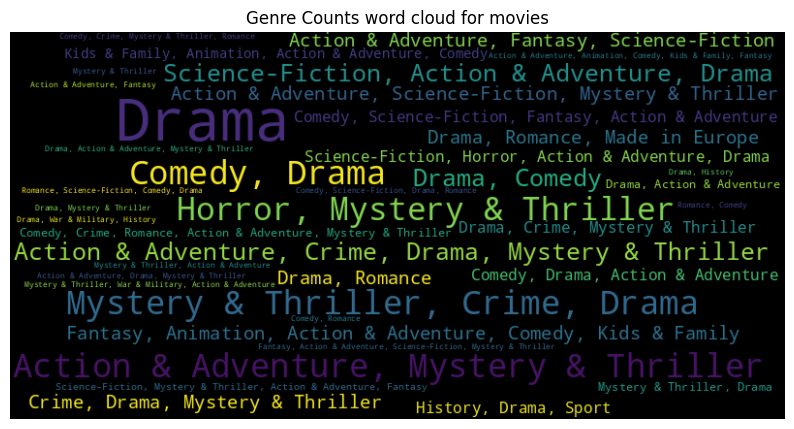

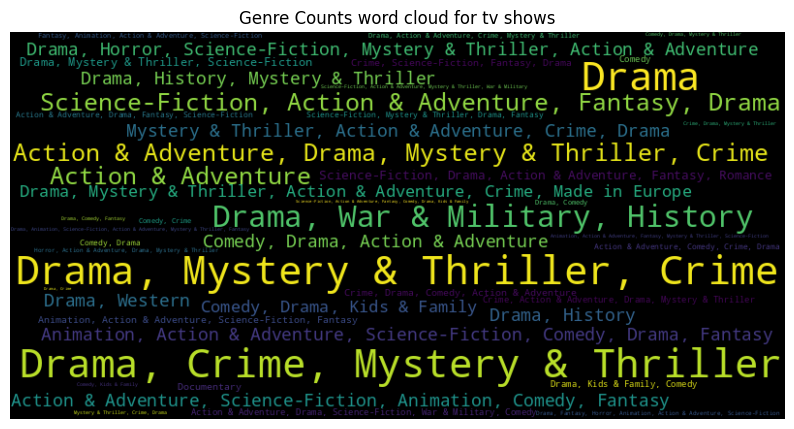

In [ ]:
#Let's Visualize it using word cloud
# import necessary libraries
import matplotlib.pyplot as plt
# import wordcloud library to create word cloud
from wordcloud import WordCloud

# Generate word cloud for movies
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(genre_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Counts word cloud for movies')
# display the wordcloud
plt.show()

# include space between both figures
print('\n')

# Generate word cloud for tv show genres
s_wordcloud = WordCloud(width=800, height = 400, background_color= 'black').generate_from_frequencies(s_genres_counts)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(s_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Counts word cloud for tv shows')
# display the wordcloud
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Find predominant streaming service for movies
stream_count = movies['Streaming Platform'].value_counts()
# Find the platform with most movie count ussing .idxmax
most_used = stream_count.idxmax()

# Find predominant streaming service for tv shows
s_stream_count = shows['Streaming Platform'].value_counts()
# Find the platform with most movie count ussing .idxmax
s_most_used = s_stream_count.idxmax()

# print the prominant streaming service for each
print(f"Most prominant streaming platform for movies: {most_used}\nMost prominant streaming platform for tv shows: {s_most_used}")

Most prominant streaming platform for movies: Netflix
Most prominant streaming platform for tv shows: Amazon Prime Video


In [ ]:
# Most dominant streaming platform considering both movies and tv shows
stream_movie = []
stream_show = []
stream_list = []

# Extract data from columns into lists
stream_movie = df['Streaming Platform'].tolist()
stream_show = s_df['Streaming Platform'].tolist()

# Concatanate both lists
stream_list = stream_movie + stream_show

# Calculate the frequency of each element using a dictionary stream_frequency
stream_frequency = {}
for stream in stream_list:
    if stream in stream_frequency:
        stream_frequency[stream] += 1
    else:
        stream_frequency[stream] = 1

# Sort the elements by frequency in descending order
ordered = sorted(stream_frequency.items(), key=lambda x: x[1], reverse=True)
print('Most dominant streaming platform is:\n')
print(ordered[0])

Most dominant streaming platform is:

('Netflix', 32)


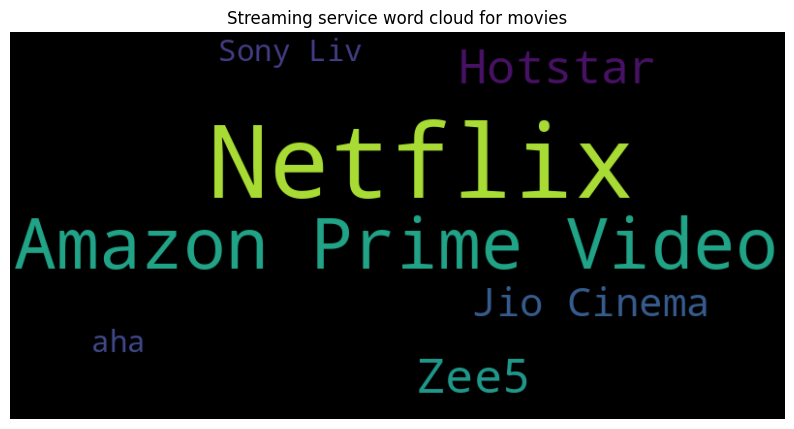

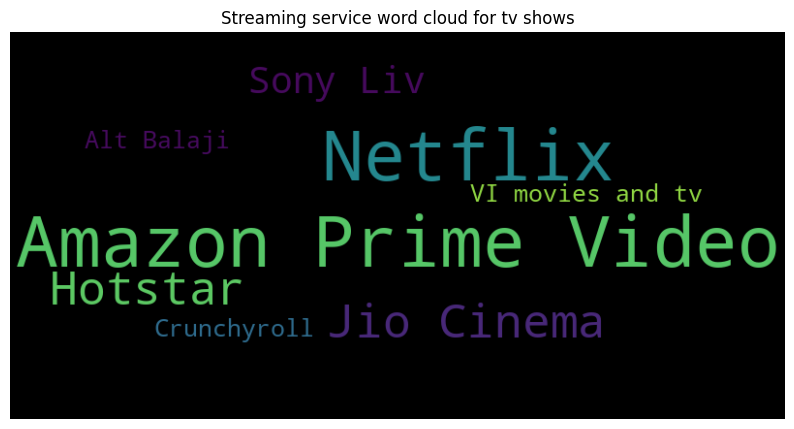

In [ ]:
#Let's Visvalize it using word cloud
streaming_wordcloud = WordCloud(width=800, height = 400, background_color= 'black').generate_from_frequencies(stream_count)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(streaming_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Streaming service word cloud for movies')
# display the wordcloud
plt.show()

print('\n')

s_streaming_wordcloud = WordCloud(width=800, height = 400, background_color= 'black').generate_from_frequencies(s_stream_count)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(s_streaming_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Streaming service word cloud for tv shows')
# display the wordcloud
plt.show()


## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format

## already done

In [ ]:
#saving filter data as Filter Data in csv format


# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***